In [21]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib_venn as venn
from matplotlib_venn import venn2, venn2_circles, venn3

# CASE 1: Results from null which follows a chi-squared with one degree of freedom distribution

In [17]:
df = pd.read_csv('MOUSE_OB_res_plots.csv',index_col=[0])

In [18]:
df

,sv_genes_spatialde,LLR_gpcounts,LLR_spatialde,sv_genes_gpcounts,gene_sh,llr_gpcounts_shuffled,LLR_shuffled,sv_genes_gpcounts_shuffled,sv_genes_spatialde_shuffled,sv_genes_spark
gene,,,,,,,,,,
Apod,Cpe,144.758380,36.655408,Cldn5,0610007N19Rik,0.843446,0.570876,Myo5a,Cplx1,2010300C02Rik
Apoe,Fabp7,137.518914,35.698017,Pmepa1,0610007P14Rik,0.000000,0.670662,Eef1a1,Nr2f2,Eef1a1
Kif5b,Kif5b,122.983762,37.146026,Pcp4,0610009B22Rik,0.660586,0.718966,Mt1,Igfbp5,Sh3gl2
Scd1,Cck,118.584288,21.540990,Apc,0610009D07Rik,0.787147,1.239042,Cplx1,4933405L10Rik,Fam213a
S100a5,Apod,108.849838,26.472945,Ube2ql1,0610009L18Rik,0.003964,0.116609,Map2,Gabra1,Dbn1
...,...,...,...,...,...,...,...,...,...,...
Zscan29,NaN,0.000000,0.222147,NaN,Zyx,0.000033,0.000964,NaN,NaN,NaN
Zwilch,NaN,0.000000,0.000964,NaN,Zzef1,0.000000,0.000964,NaN,NaN,NaN
Zxda,NaN,0.000000,0.000964,NaN,Zzz3,0.000074,0.000964,NaN,NaN,NaN


{'Olfr635', 'Taf7l', 'Gna14', '4933405L10Rik', 'Tspan7'}


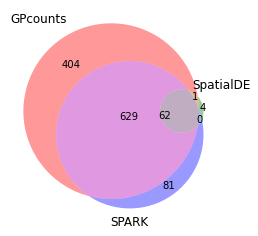

In [35]:
gpcounts = df['sv_genes_gpcounts']
spatialde = df['sv_genes_spatialde']
spark = df['sv_genes_spark']
gpcounts = gpcounts.iloc[0:1096]
spatialde = spatialde.iloc[0:67]
spark = spark.iloc[0:772]
labels = ['Taf7l', 'Gna14', 'Olfr635', '4933405LRik']
v = venn3([set(gpcounts),set(spatialde),set(spark)],set_labels = ('GPcounts', 'SpatialDE', 'SPARK'))
# plt.show()
print(set(spatialde).difference(set(spark)))
print(set(spatialde).difference(set(gpcounts)))
# plt.savefig('venn_updated_withspark.pdf',dpi=100)

In [8]:
!pip install pyreadr

In [9]:
import pyreadr

result = pyreadr.read_r('Rep11_MOB_spark.rds') # also works for RData


ModuleNotFoundError: No module named 'pyreadr'

/Users/user/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


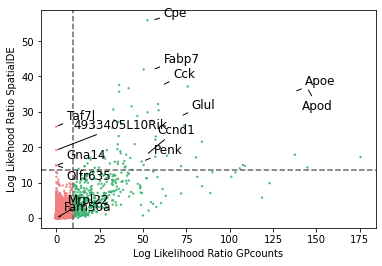

In [13]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l>10:
            cols.append('mediumseagreen')
        else:
            cols.append('lightcoral')

    return cols

llr_gp = df['LLR_gpcounts']
llr_sd = df['LLR_spatialde']
cols=pltcolor(df.LLR_gpcounts)
plt.scatter(llr_gp, llr_sd, c=cols, s=2, alpha=0.8)
plt.axhline(y=13.64, color="dimgrey",linestyle="--", gid='p')
plt.axvline(x=9.95, color="dimgrey",linestyle="--")
plt.ylabel('Log Likehood Ratio SpatialDE')
plt.xlabel('Log Likelihood Ratio GPcounts')

names = ['Taf7l', '4933405L10Rik', 'Gna14', 'Olfr635', 
         'Glul', 'Cpe', 'Fabp7', 'Apoe', 'Cck', 'Mrpl22', 'Penk', 'Ccnd1', 'Fam50a','Apod']
coorx = [2.90e-07,1.63E-08,1.63E-08,1.63E-08,72.04457624,
         55.79384567,55.87592238,137.5189143,61.33918072,0.621936523,50.39398168,52.21644669,0.189971479,144.75838]
coory = [25.802,19.15060518,14.84815196,14.84815196,28.81973096,
         55.87592238,41.96622866,35.69801676,37.57358376,0.15647426,16.07397632,17.90521864,0.053959575,36.65540836]
off_x = [6,10,6,6,6,6,6,6,6,6,6,6,4,-3]
off_y = [2,6,2,-4,2,1,2,2,2,4,2,6,2,-6]

for i in range(len(names)):
    plt.annotate(
    s=names[i], xy=(coorx[i],coory[i]), xytext=(coorx[i]+off_x[i], coory[i]+off_y[i]),
    arrowprops=dict(facecolor='red', arrowstyle ='-'), fontsize=12)


# CASE 2: Results from permuted null distribution

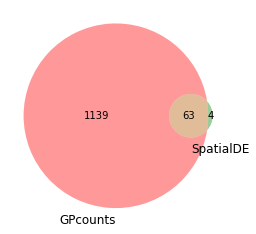

In [72]:
# gpcounts permutation test and computation of the p values using the shuffled LLR distribution while for spatialDE the original results (not permuted) have been used.
gpcounts = df['sv_genes_gpcounts_shuffled']
spatialde = df['sv_genes_spatialde']
gpcounts = gpcounts.iloc[0:1202]
spatialde = spatialde.iloc[0:67]
labels = ['Taf7l', 
          'Gna14', 
          'Olfr635', 
          '4933405L10Rik']
v = venn2([set(gpcounts),set(spatialde)],set_labels = ('GPcounts', 'SpatialDE'))

plt.annotate(labels, xy=v.get_label_by_id('010').get_position() +
             np.array([0, -0.1]), xytext=(30,60),
             textcoords='offset points', 
             bbox=dict(boxstyle='square',fc='teal', alpha=0.3),
             arrowprops=dict(arrowstyle='->'))


In [70]:
gpcounts[1201]

'Pi4ka'

Text(30, 60, "['Taf7l', '4933405L10Rik']")

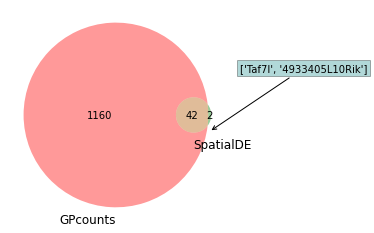

In [77]:
# the results are taken from spatialDE and gpcounts permutation tests and computation of the p values using the shuffled LLR distribution (without assuming chi-squared distributed null)

gpcounts = df['sv_genes_gpcounts_shuffled']
spatialde = df['sv_genes_spatialde_shuffled']
gpcounts = gpcounts.iloc[0:1202]
spatialde = spatialde.iloc[0:44]
v = venn2([set(gpcounts),set(spatialde)],set_labels = ('GPcounts', 'SpatialDE'))
labels = ['Taf7l','4933405L10Rik']

plt.annotate(labels, xy=v.get_label_by_id('010').get_position() +
             np.array([0, -0.1]), xytext=(30,60),
             textcoords='offset points', 
             bbox=dict(boxstyle='square', fc='teal', alpha=0.3),
             arrowprops=dict(arrowstyle='->'))

In [75]:
spatialde[43]

'Ccnd1'